# Visualization 2

### Geographic Data / Maps

#### Installation
```python
pip3 install --upgrade pip
pip3 install geopandas shapely descartes geopy netaddr
sudo apt install -y python3-rtree
```

- `import geopandas as gpd`
- `.shp` => Shapefile
- `gpd.datasets.get_path(<shp file path>)`:
    - example: `gpd.datasets.get_path("naturalearth_lowres")`
- `gpd.read_file(<path>)`

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
import requests
import re
import os

# new import statements
import geopandas as gpd
from shapely.geometry import Point, Polygon, box

In [2]:
!ls /home/gurmail.singh/.local/lib/python3.8/site-packages/geopandas/datasets/naturalearth_lowres

naturalearth_lowres.cpg  naturalearth_lowres.prj  naturalearth_lowres.shx
naturalearth_lowres.dbf  naturalearth_lowres.shp


In [3]:
!ls /home/gurmail.singh/.local/lib/python3.8/site-packages/geopandas/datasets

__init__.py  naturalearth_cities       naturalearth_lowres
__pycache__  naturalearth_creation.py  nybb_16a.zip


In [4]:
# Find the path for "naturalearth_lowres"
path = gpd.datasets.get_path("naturalearth_lowres")
# Read the shapefile for "naturalearth_lowres" and
# set index using "name" column
gdf = gpd.read_file(path).set_index("name")

/tmp/ipykernel_22480/2175405820.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path = gpd.datasets.get_path("naturalearth_lowres")


In [5]:
gdf.head()

,pop_est,continent,iso_a3,gdp_md_est,geometry
name,,,,,
Fiji,889953.0,Oceania,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
Tanzania,58005463.0,Africa,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
W. Sahara,603253.0,Africa,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
Canada,37589262.0,North America,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
United States of America,328239523.0,North America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [6]:
type(gdf).__mro__

(geopandas.geodataframe.GeoDataFrame,
 geopandas.base.GeoPandasBase,
 pandas.core.frame.DataFrame,
 pandas.core.generic.NDFrame,
 pandas.core.base.PandasObject,
 pandas.core.accessor.DirNamesMixin,
 pandas.core.indexing.IndexingMixin,
 pandas.core.arraylike.OpsMixin,
 object)

In [7]:
# All shapefiles have a column called "geometry"
gdf["geometry"]

name
Fiji                        MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
Tanzania                    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
W. Sahara                   POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
Canada                      MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
United States of America    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
                                                  ...                        
Serbia                      POLYGON ((18.82982 45.90887, 18.82984 45.90888...
Montenegro                  POLYGON ((20.07070 42.58863, 19.80161 42.50009...
Kosovo                      POLYGON ((20.59025 41.85541, 20.52295 42.21787...
Trinidad and Tobago         POLYGON ((-61.68000 10.76000, -61.10500 10.890...
S. Sudan                    POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...
Name: geometry, Length: 177, dtype: geometry

In [8]:
type(gdf["geometry"]).__mro__

(geopandas.geoseries.GeoSeries,
 geopandas.base.GeoPandasBase,
 pandas.core.series.Series,
 pandas.core.base.IndexOpsMixin,
 pandas.core.arraylike.OpsMixin,
 pandas.core.generic.NDFrame,
 pandas.core.base.PandasObject,
 pandas.core.accessor.DirNamesMixin,
 pandas.core.indexing.IndexingMixin,
 object)

Fiji


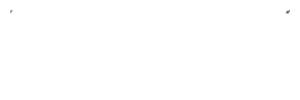

In [9]:
# First country's name and geometry
print(gdf.index[0])
gdf["geometry"].iat[0]

Tanzania


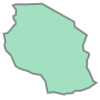

In [10]:
# Second country's name and geometry
print(gdf.index[1])
gdf["geometry"].iat[1]

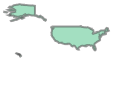

In [11]:
# Geometry for "United States of America"
gdf.at["United States of America", "geometry"]

In [12]:
# Type of Tanzania's geometry
print(gdf.index[1], type(gdf["geometry"].iat[1]))

# Type of United States of America's geometry
print("United States of America", type(gdf.at["United States of America", "geometry"]))

Tanzania <class 'shapely.geometry.polygon.Polygon'>
United States of America <class 'shapely.geometry.multipolygon.MultiPolygon'>


- `gdf.plot(figsize=(<width>, <height>), column=<column name>)`
- `ax.set_axis_off()`

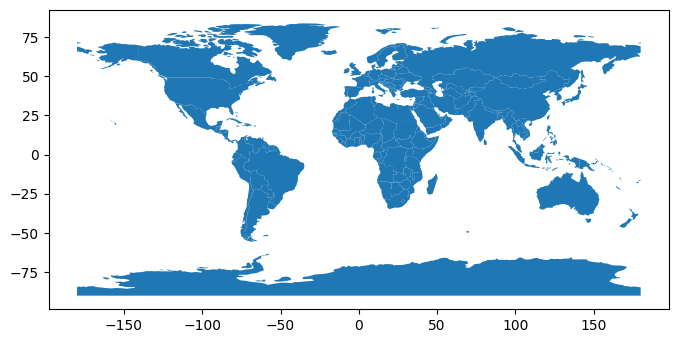

In [13]:
ax = gdf.plot(figsize=(8,4))

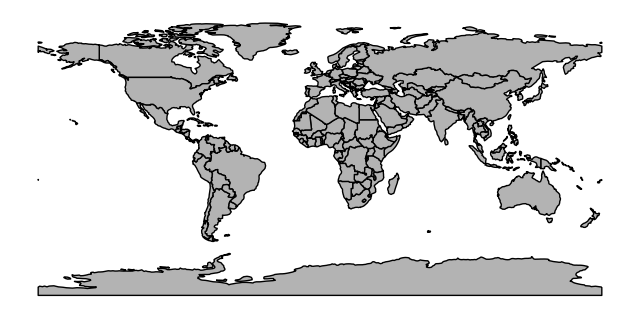

In [14]:
# Set facecolor="0.7", edgecolor="black"
ax = gdf.plot(figsize=(8,4), facecolor="0.7", edgecolor="black")
# Turn off the axes
ax.set_axis_off()

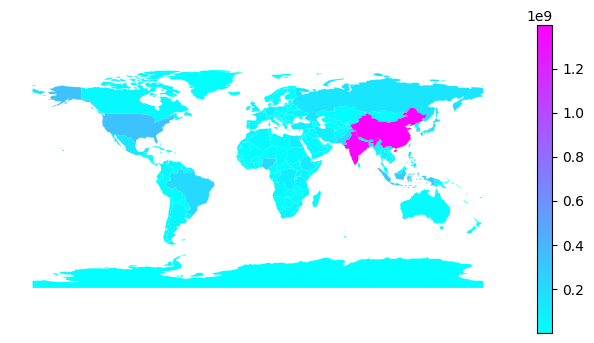

In [15]:
# Color the map based on population column and set cmap="cool"
ax = gdf.plot(figsize=(8,4), column="pop_est", legend=True, cmap="cool")
ax.set_axis_off()

#### Create a map where countries with >100M people are red, others are gray.

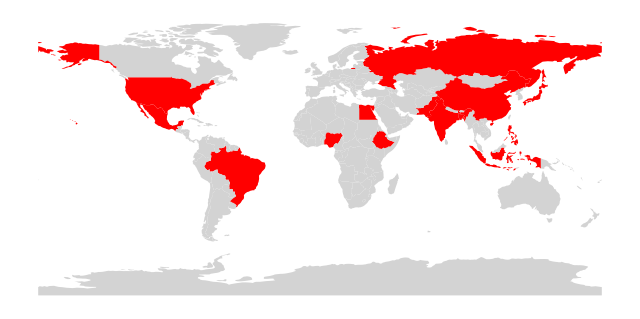

In [16]:
# Create a map where countries with >100M people are red, others are gray

# Add a new column called color to gdf and set default value to "lightgray"
gdf["color"] = "lightgray"
# Boolean indexing to set color to red for countries with "pop_est" > 1e8
gdf.loc[gdf["pop_est"] > 1e8, "color"] = "red"
# Create the plot
ax = gdf.plot(figsize=(8,4), color=gdf["color"])
ax.set_axis_off()

### All shapefile geometries are shapely shapes. 

In [17]:
type(gdf["geometry"].iat[2])

shapely.geometry.polygon.Polygon

### Shapely shapes

- `from shapely.geometry import Point, Polygon, box`
- `Polygon([(<x1>, <y1>), (<x2>, <y2>), (<x3>, <y3>), ...])`
- `box(minx, miny, maxx, maxy)`
- `Point(<x>, <y>)`
- `<shapely object>.buffer(<size>)`
    - example: `Point(5, 5).buffer(3)` creates a circle

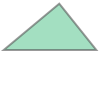

In [18]:
triangle = Polygon([(0, 0), (1.2, 1), (2, 0)])   # triangle
triangle

In [19]:
type(triangle)

shapely.geometry.polygon.Polygon

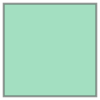

In [20]:
box1 = box(0, 0, 1, 1) # not a type; just a function that creates box
box1

In [21]:
type(box1)

shapely.geometry.polygon.Polygon

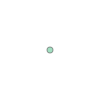

In [22]:
point = Point(5, 5)
point

In [23]:
type(point)

shapely.geometry.point.Point

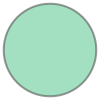

In [24]:
circle = point.buffer(1)
circle

In [25]:
type(circle)

shapely.geometry.polygon.Polygon

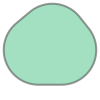

In [26]:
triangle_buffer = triangle.buffer(3)
triangle_buffer

In [27]:
type(triangle_buffer)

shapely.geometry.polygon.Polygon

#### Shapely methods

- Shapely methods:
    - `union`:  any point that is in either shape (OR)
    - `intersection`: any point that is in both shapes (AND)
    - `difference`: subtraction
    - `intersects`: do they overlap? returns True / False

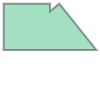

In [28]:
triangle.union(box1)   # any point that is in either shape (OR)

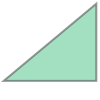

In [29]:
triangle.intersection(box1)   # any point that is in both shapes (AND)

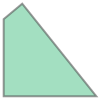

In [30]:
triangle.difference(box1)   # subtraction

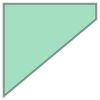

In [31]:
box1.difference(triangle)   # subtraction

In [32]:
triangle.intersects(box1) # do they overlap?

True

Is the point "near" (<6 units) the triangle?

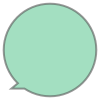

In [33]:
triangle.union(point.buffer(6))

In [34]:
triangle.intersects(point.buffer(6))

True

#### Extracting "Europe" data from "naturalearth_lowres"

In [35]:
# Europe bounding box
eur_window = box(-10.67, 34.5, 31.55, 71.05)

Can we use `intersects` method?

In [36]:
gdf.intersects(eur_window)

name
Fiji                        False
Tanzania                    False
W. Sahara                   False
Canada                      False
United States of America    False
                            ...  
Serbia                       True
Montenegro                   True
Kosovo                       True
Trinidad and Tobago         False
S. Sudan                    False
Length: 177, dtype: bool

<Axes: >

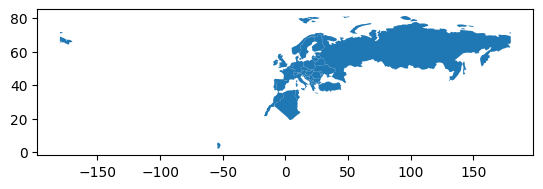

In [37]:
# Incorrect v1
gdf[gdf.intersects(eur_window)].plot()

<Axes: >

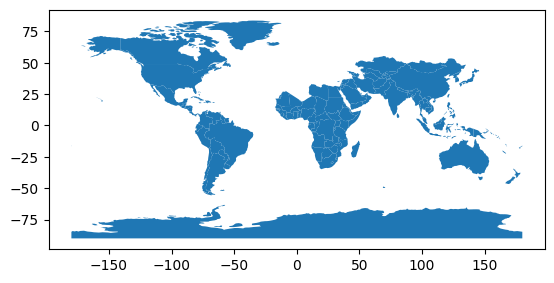

In [38]:
# Incorrect v2
gdf[~gdf.intersects(eur_window)].plot()

Can we use `intersection` method?

In [39]:
gdf.intersection(eur_window)

name
Fiji                                                            POLYGON EMPTY
Tanzania                                                        POLYGON EMPTY
W. Sahara                                                       POLYGON EMPTY
Canada                                                          POLYGON EMPTY
United States of America                                        POLYGON EMPTY
                                                  ...                        
Serbia                      POLYGON ((18.82984 45.90888, 19.59604 46.17173...
Montenegro                  POLYGON ((19.80161 42.50009, 19.73805 42.68825...
Kosovo                      POLYGON ((20.52295 42.21787, 20.28375 42.32026...
Trinidad and Tobago                                             POLYGON EMPTY
S. Sudan                                                        POLYGON EMPTY
Length: 177, dtype: geometry

<Axes: >

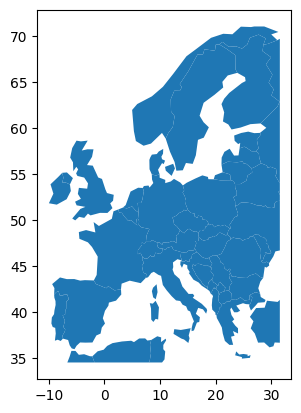

In [40]:
gdf.intersection(eur_window).plot()

How can we get rid of empty polygons (and remove the warning)?

In [41]:
eur = gdf.intersection(eur_window)
eur.is_empty

name
Fiji                         True
Tanzania                     True
W. Sahara                    True
Canada                       True
United States of America     True
                            ...  
Serbia                      False
Montenegro                  False
Kosovo                      False
Trinidad and Tobago          True
S. Sudan                     True
Length: 177, dtype: bool

Remove all the empty polygons using `is_empty`.

In [42]:
eur = eur[~eur.is_empty]
eur

name
Russia              MULTIPOLYGON (((31.54002 52.74205, 31.30520 53...
Norway              POLYGON ((29.39955 69.15692, 28.59193 69.06478...
France              MULTIPOLYGON (((6.65823 49.20196, 8.09928 49.0...
Tunisia             POLYGON ((8.14098 34.65515, 8.37637 35.47988, ...
Algeria             POLYGON ((-1.79299 34.52792, -2.16991 35.16840...
Sweden              POLYGON ((11.46827 59.43239, 12.30037 60.11793...
Belarus             POLYGON ((29.22951 55.91834, 29.37157 55.67009...
Ukraine             POLYGON ((30.74875 46.58310, 30.37761 46.03241...
Poland              POLYGON ((23.52754 53.47012, 23.80493 53.08973...
Austria             POLYGON ((16.90375 47.71487, 16.34058 47.71290...
Hungary             POLYGON ((22.64082 48.15024, 22.71053 47.88219...
Moldova             POLYGON ((26.85782 48.36821, 27.52254 48.46712...
Romania             POLYGON ((28.67978 45.30403, 29.14972 45.46493...
Lithuania           POLYGON ((26.58828 55.16718, 25.76843 54.84696...
Latvia         

<Axes: >

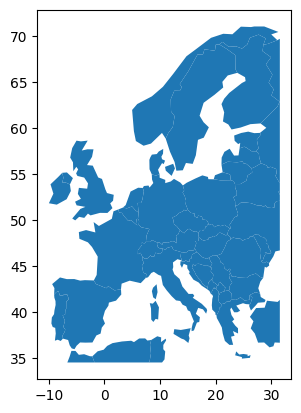

In [43]:
eur.plot()

#### Centroids of European countries

/tmp/ipykernel_22480/1089923979.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  eur.centroid.plot(ax=ax)


<Axes: >

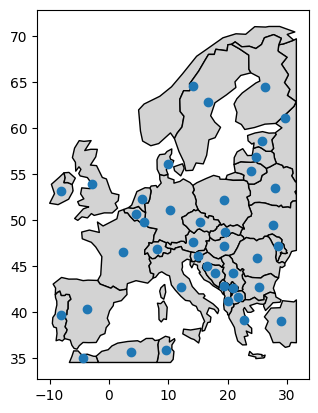

In [44]:
# plot the centroids
ax = eur.plot(facecolor="lightgray", edgecolor="k")
eur.centroid.plot(ax=ax)

### Lat / Lon CRS

- Lon is x-coord
- Lat is y-coord
    - tells you where the point on Earth is
- **IMPORTANT**: degrees are not a unit of distance. 1 degree of longitute near the equator is a lot farther than moving 1 degree of longitute near the north pole

Using `.crs` to access CRS of a gdf.




In [45]:
eur.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### Single CRS doesn't work for the whole earth

- Setting a different CRS for Europe that is based on meters.
- https://spatialreference.org/ref/?search=europe

In [46]:
# Setting CRS to "EPSG:3035"


In [47]:
# Setting CRS to "EPSG:3035"
eur2 = eur.to_crs("EPSG:3035")
eur2.crs

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Türkiye (Turkey); United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Eur

<Axes: >

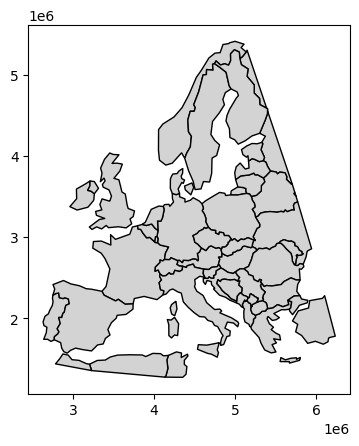

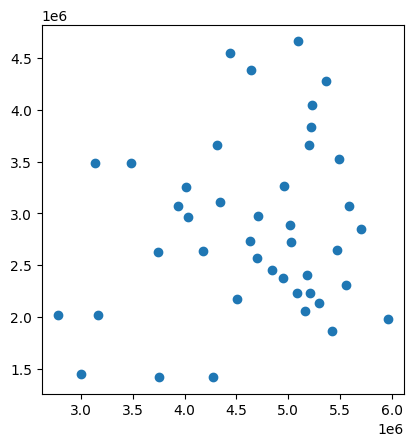

In [48]:
ax = eur2.plot(facecolor="lightgray", edgecolor="k")
eur2.centroid.plot()

<Axes: >

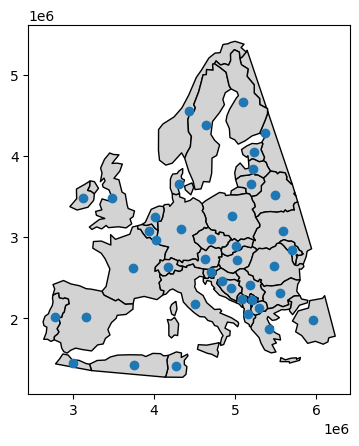

In [49]:
ax = eur2.plot(facecolor="lightgray", edgecolor="k")
eur2.centroid.plot(ax=ax)

#### How much error does lat/long computation introduce?

/tmp/ipykernel_22480/2170279601.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  eur.centroid.to_crs("EPSG:3035").plot(ax=ax, color="r")  # red => miscalculated


<Axes: >

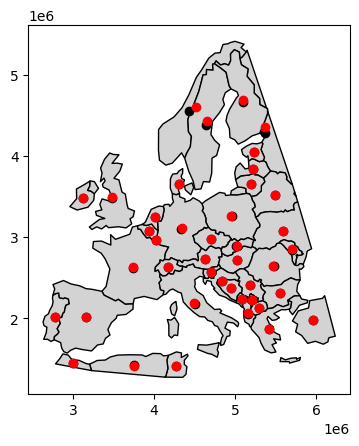

In [50]:
ax = eur2.plot(facecolor="lightgray", edgecolor="k")
eur2.centroid.plot(ax=ax, color="k") # black => correct
eur.centroid.to_crs("EPSG:3035").plot(ax=ax, color="r")  # red => miscalculated

In [51]:
type(eur2.iloc[0])

shapely.geometry.multipolygon.MultiPolygon

In [52]:
type(eur2).__mro__

(geopandas.geoseries.GeoSeries,
 geopandas.base.GeoPandasBase,
 pandas.core.series.Series,
 pandas.core.base.IndexOpsMixin,
 pandas.core.arraylike.OpsMixin,
 pandas.core.generic.NDFrame,
 pandas.core.base.PandasObject,
 pandas.core.accessor.DirNamesMixin,
 pandas.core.indexing.IndexingMixin,
 object)

#### Area of European countries

In [53]:
eur2.area # area in sq meters

name
Russia              2.024604e+11
Norway              3.286343e+11
France              5.595585e+11
Tunisia             6.547702e+10
Algeria             2.043067e+11
Sweden              4.505641e+11
Belarus             2.039346e+11
Ukraine             2.857955e+11
Poland              3.103969e+11
Austria             8.506301e+10
Hungary             9.247413e+10
Moldova             3.232099e+10
Romania             2.383473e+11
Lithuania           6.382974e+10
Latvia              6.392371e+10
Estonia             4.467593e+10
Germany             3.574253e+11
Bulgaria            1.102150e+11
Greece              1.319524e+11
Turkey              2.217875e+11
Albania             2.969486e+10
Croatia             5.752945e+10
Switzerland         4.618538e+10
Luxembourg          2.416819e+09
Belgium             3.012566e+10
Netherlands         4.002133e+10
Portugal            9.340841e+10
Spain               5.023083e+11
Ireland             5.845217e+10
Italy               3.150991e+11
Denma

What is the area in **sq miles**?

In [54]:
# Conversion: / 1000 / 1000 / 2.59
(eur2.area / 1000 / 1000 / 2.59).sort_values(ascending=False)
# careful!  some countries (e.g., Russia) were cropped when we did intersection

name
France              216045.735320
Spain               193941.416516
Sweden              173962.955903
Germany             138002.030052
Finland             131750.182704
Norway              126885.828356
Italy               121659.867544
Poland              119844.344075
Ukraine             110345.741832
United Kingdom       96519.589998
Romania              92025.972522
Turkey               85632.236650
Algeria              78882.882393
Belarus              78739.245551
Russia               78170.023756
Greece               50946.870966
Bulgaria             42554.046136
Portugal             36065.021674
Hungary              35704.295877
Austria              32842.862855
Czechia              31354.126319
Serbia               29493.813018
Tunisia              25280.702563
Latvia               24680.969176
Lithuania            24644.688797
Ireland              22568.405096
Croatia              22212.141886
Bosnia and Herz.     19538.365073
Slovakia             18172.796262
Switzerla

In [55]:
# area on screen, not real area
eur.area

/tmp/ipykernel_22480/3689342177.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  eur.area


name
Russia              35.748174
Norway              61.455274
France              65.673811
Tunisia              6.540885
Algeria             21.165124
Sweden              79.446214
Belarus             27.622448
Ukraine             35.483088
Poland              40.759231
Austria             10.179604
Hungary             10.980058
Moldova              3.837658
Romania             27.621146
Lithuania            9.022101
Latvia               9.398691
Estonia              6.905922
Germany             45.923594
Bulgaria            12.119548
Greece              13.743985
Turkey              23.109344
Albania              3.185163
Croatia              6.570063
Switzerland          5.440201
Luxembourg           0.301516
Belgium              3.829997
Netherlands          5.264180
Portugal             9.802468
Spain               53.268425
Ireland              7.860299
Italy               34.685652
Denmark              6.168457
United Kingdom      34.202954
Slovenia             2.225310
Finla

### CRS

- `<GeoDataFrame object>.crs`: gives you information about current CRS.
- `<GeoDataFrame object>.to_crs(<TARGET CRS>)`: changes CRS to `<TARGET CRS>`.

### Madison area emergency services

- Data source: https://data-cityofmadison.opendata.arcgis.com/
    - Search for:
        - "City limit"
        - "Lakes and rivers"
        - "Fire stations"
        - "Police stations"

- CRS for Madison area: https://en.wikipedia.org/wiki/Universal_Transverse_Mercator_coordinate_system#/media/File:Universal_Transverse_Mercator_zones.svg

In [56]:
city = gpd.read_file("City_Limit.zip").to_crs("epsg:32616")

In [57]:
city.crs

<Projected CRS: EPSG:32616>
Name: WGS 84 / UTM zone 16N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 90°W and 84°W, northern hemisphere between equator and 84°N, onshore and offshore. Belize. Canada - Manitoba; Nunavut; Ontario. Costa Rica. Cuba. Ecuador - Galapagos. El Salvador. Guatemala. Honduras. Mexico. Nicaragua. United States (USA).
- bounds: (-90.0, 0.0, -84.0, 84.0)
Coordinate Operation:
- name: UTM zone 16N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [58]:
water = gpd.read_file("Lakes_and_Rivers.zip").to_crs(city.crs)
fire = gpd.read_file("Fire_Stations.zip").to_crs(city.crs)
police = gpd.read_file("Police_Stations.zip").to_crs(city.crs)

#### Run this on your virtual machine

`sudo sh -c "echo 'Options = UnsafeLegacyRenegotiation' >> /etc/ssl/openssl.cnf"`

then restart notebook!

#### GeoJSON

How to find the below URL?

- Go to info page of a dataset, for example: https://data-cityofmadison.opendata.arcgis.com/datasets/police-stations/explore?location=43.081769%2C-89.391550%2C12.81
- Then click on "I want to use this" > "View API Resources" > "GeoJSON"

In [59]:
url = "https://maps.cityofmadison.com/arcgis/rest/services/Public/OPEN_DATA/MapServer/2/query?outFields=*&where=1%3D1&f=geojson"
police2 = gpd.read_file(url).to_crs(city.crs)

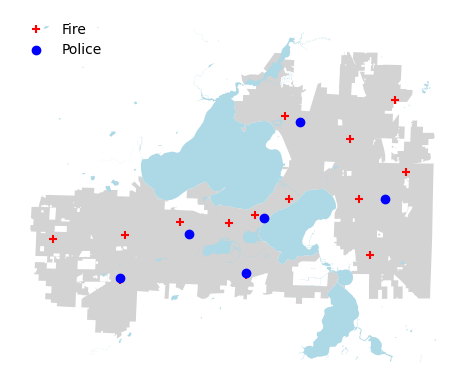

In [60]:
ax = city.plot(color="lightgray")
water.plot(color="lightblue", ax=ax)
fire.plot(color="red", ax=ax, marker="+", label="Fire")
police2.plot(color="blue", ax=ax, label="Police")
ax.legend(loc="upper left", frameon=False)
ax.set_axis_off()

In [61]:
fire.to_file("fire.geojson")

### Geocoding: street address => lat / lon


- `gpd.tools.geocode(<street address>, provider=<geocoding service name>, user_agent=<user agent name>)`: converts street address into lat/long


#### Daily incident reports: https://www.cityofmadison.com/fire/daily-reports

In [62]:
url = "https://www.cityofmadison.com/fire/daily-reports"
r = requests.get(url)
r

<Response [200]>

In [63]:
r.raise_for_status() # give me an exception if not 200 (e.g., 404)

In [64]:
# doesn't work
# pd.read_html(url)

In [65]:
# print(r.text)

Find all **span** tags with **streetAddress** using regex.

In [66]:
# <p>1700 block Thierer Road<br>
# addrs = re.findall(r'<p>1700 block Thierer Road<br>', r.text)

In [67]:
addrs = re.findall(r' <p>(.*?)<br>', r.text)
addrs = pd.Series(addrs)
addrs

0                      1700 block Thierer Road
1                       6400 block Bridge Road
2                  800 block W. Johnson Street
3                      700 block Vernon Avenue
4    U.S. Highway 12 WB &amp; John Nolen Drive
5                   900 block Delaplaine Court
6                        6900 block Odana Road
7                             East Campus Mall
8         N. Stoughton Road &amp; Hoepker Road
9                      0 block West Towne Mall
dtype: object

#### Without city name and state name, geocoding would return match with the most famous location with such a street name.

In [68]:
geo_info = gpd.tools.geocode("1300 East Washington Ave")
geo_info

,geometry,address
0,POINT (-117.39118 47.64686),"1300, East 9th Avenue, 99202, East 9th Avenue,..."


In [69]:
geo_info["address"].loc[0]

'1300, East 9th Avenue, 99202, East 9th Avenue, Spokane, WA, United States'

#### To get the correct address we want, we should concatenate "Madison, Wisconsin" to the end of the address.

In [70]:
geo_info = gpd.tools.geocode("1300 East Washington Ave, Madison, Wisconsin")
geo_info

,geometry,address
0,POINT (-89.29287 43.13960),"East Washington Avenue, 53701, Madison, Wiscon..."


#### Addresses with "block" often won't work or won't give you the correct lat/long. We need to remove the word "block" before geocoding.

In [71]:
gpd.tools.geocode("800 block W. Johnson Street, Madison, Wisconsin")

,geometry,address
0,POINT (-91.22788 43.88605),"800, Madison Street, 54650, Madison Street, On..."


In [72]:
gpd.tools.geocode("800 W. Johnson Street, Madison, Wisconsin")

,geometry,address
0,POINT (-88.74367 42.84436),"University of Wisconsin-Whitewater, 800, West ..."


In [73]:
fixed_addrs = addrs.str.replace(" block ", " ") + ", Madison, WI"
fixed_addrs

0                       1700 Thierer Road, Madison, WI
1                        6400 Bridge Road, Madison, WI
2                   800 W. Johnson Street, Madison, WI
3                       700 Vernon Avenue, Madison, WI
4    U.S. Highway 12 WB &amp; John Nolen Drive, Mad...
5                    900 Delaplaine Court, Madison, WI
6                         6900 Odana Road, Madison, WI
7                        East Campus Mall, Madison, WI
8    N. Stoughton Road &amp; Hoepker Road, Madison, WI
9                       0 West Towne Mall, Madison, WI
dtype: object

#### Using a different provider than the default one

- `gpd.tools.geocode(<street address>, provider=<geocoding service name>, user_agent=<user agent name>)`: converts street address into lat/long
    - We will be using "OpenStreetMap", for which the argument is "nominatim"
    - We also need to specify argument to `user_agent` parameter, indicating where the request is coming from; for example: "cs320_bot"

In [74]:
incidents = gpd.tools.geocode(fixed_addrs, provider="nominatim", user_agent="cs320bot")
incidents

,geometry,address
0,POINT (-89.31206 43.12188),"1700, Thierer Road, Mayfair Park, Madison, Dan..."
1,POINT (-89.33876 43.04856),"6400, Bridge Road, Bridge-Lakepoint, Monona, D..."
2,POINT (-89.39985 43.07217),"800, West Johnson Street, State-Langdon, Bowen..."
3,POINT (-89.30584 43.08825),"700, Vernon Avenue, Rolling Meadows, Madison, ..."
4,POINT EMPTY,None
5,POINT (-89.40073 43.05908),"900, Delaplaine Court, Greenbush, Madison, Dan..."
6,POINT (-89.50167 43.05667),"6900, Odana Road, Madison, Dane County, Wiscon..."
7,POINT (-89.39919 43.06913),"East Campus Mall, State-Langdon, Bowens Additi..."
8,POINT EMPTY,None
9,POINT (-89.50622 43.05752),"West Towne Mall, Madison, Dane County, Wiscons..."


It is often a good idea to drop na values. Although in this version of the example, there are no failed geocodings.

In [75]:
incidents = incidents.dropna()
incidents

,geometry,address
0,POINT (-89.31206 43.12188),"1700, Thierer Road, Mayfair Park, Madison, Dan..."
1,POINT (-89.33876 43.04856),"6400, Bridge Road, Bridge-Lakepoint, Monona, D..."
2,POINT (-89.39985 43.07217),"800, West Johnson Street, State-Langdon, Bowen..."
3,POINT (-89.30584 43.08825),"700, Vernon Avenue, Rolling Meadows, Madison, ..."
5,POINT (-89.40073 43.05908),"900, Delaplaine Court, Greenbush, Madison, Dan..."
6,POINT (-89.50167 43.05667),"6900, Odana Road, Madison, Dane County, Wiscon..."
7,POINT (-89.39919 43.06913),"East Campus Mall, State-Langdon, Bowens Additi..."
9,POINT (-89.50622 43.05752),"West Towne Mall, Madison, Dane County, Wiscons..."


#### Self-practice

If you want practice with regex, try to write regular expression and use the match result to make sure that "Madison" and "Wisconsin" is part of each address.

In [76]:
# self-practice
for addr in incidents["address"]:
    print(addr)

1700, Thierer Road, Mayfair Park, Madison, Dane County, Wisconsin, 53704, United States
6400, Bridge Road, Bridge-Lakepoint, Monona, Dane County, Wisconsin, 53713, United States
800, West Johnson Street, State-Langdon, Bowens Addition, Madison, Dane County, Wisconsin, 53706, United States
700, Vernon Avenue, Rolling Meadows, Madison, Dane County, Wisconsin, 53714, United States
900, Delaplaine Court, Greenbush, Madison, Dane County, Wisconsin, 53715, United States
6900, Odana Road, Madison, Dane County, Wisconsin, 53719, United States
East Campus Mall, State-Langdon, Bowens Addition, Madison, Dane County, Wisconsin, 53715, United States
West Towne Mall, Madison, Dane County, Wisconsin, United States


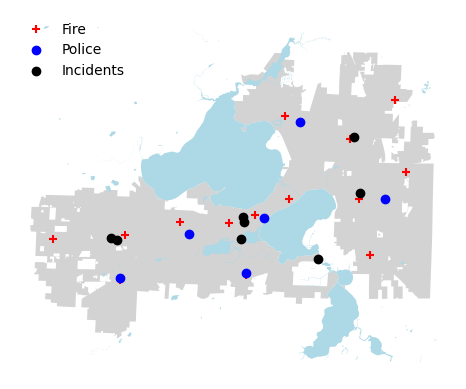

In [77]:
ax = city.plot(color="lightgray")
water.plot(color="lightblue", ax=ax)
fire.plot(color="red", ax=ax, marker="+", label="Fire")
police2.plot(color="blue", ax=ax, label="Police")
incidents.to_crs(city.crs).plot(ax=ax, color="k", label="Incidents")
ax.legend(loc="upper left", frameon=False)
ax.set_axis_off()